# Question a

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

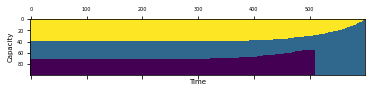

In [584]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# mu = 0.001, 0.015, 0.05
# v = 0.01, 0.005, 0.0025
# f = 500, 300, 200
c = 100
T = 600
value = []
optimal = []

def lamda_t(t, mu, v):
    p = mu*(np.exp(v*t))
    return p

def calculate_v():
    # value = [[0]*601]*101 
    value = [[0 for i in range(601)]for j in range(101)]
    policy = [[0 for i in range(600)]for j in range(100)]
    list_value = [[500, 300, 200],
                  [0.001, 0.015, 0.05],
                  [0.01, 0.005, 0.0025]]
    for x in range(1, c+1):
        for t in reversed(range(T)):
            vtx = []
            for l in range(len(list_value[0])):
                lamda = 0
                for i in range(l+1):
                    lamda += lamda_t(t+1, list_value[1][i], list_value[2][i])
                f = list_value[0][l]
                vx = lamda*(f+value[x-1][t+1])+(1-lamda)*value[x][t+1]
                vtx.append(vx)
            value[x][t] = max(vtx)
            index = vtx.index(max(vtx))
            policy[x-1][t] = list_value[0][index]
    return value, policy

value, policy = calculate_v()
print(value)
print(policy)
npvalue = np.array(value)
print(npvalue.shape)
nppolicy = np.array(policy)
print(nppolicy.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(nppolicy)
ax.set_xlabel('Time', fontsize=7)
ax.set_ylabel('Capacity', fontsize=7)
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5)
# plt.savefig('policy.png', bbox_inches='tight')
plt.show()

# Question c simulation

In [517]:
# import random
# list_value = [[500, 300, 200],
#               [0.001, 0.015, 0.05],
#               [0.01, 0.005, 0.0025]]
# demandprob = [[1 for i in range(4)]for j in range(600)]
# demand = []
# result = []
# for t in range(T):
#     for l in range(len(list_value[0])):
#         p = lamda_t(t+1, list_value[1][l], list_value[2][l])
#         demandprob[t][l] = p
# npdemand = np.array(demandprob)
# npdemand[:, 1] = npdemand[:, 0] + npdemand[:, 1]
# npdemand[:, 2] = npdemand[:, 1] + npdemand[:, 2]
# for t in range(T):
#     n = random.random()
#     if n <= npdemand[t,0]:
#         demand.append(list_value[0][0])
#     elif n <= npdemand[t,1] and n > npdemand[t,0]:
#         demand.append(list_value[0][1])
#     elif n <= npdemand[t,2] and n > npdemand[t,1]:
#         demand.append(list_value[0][2])
#     else:
#         demand.append(0)
print(demand)
print(sum(i==0 for i in demand))
time = 0
capacity = 100
cap = []
action = []
result = []
for ind in reversed(range(c)):
    for index, po in enumerate(policy[ind]):
        if time == 600 or capacity == 0:
            break
        elif len(result) == 600:
            break
        elif index == time:
            cap.append(capacity)
            action.append(po)
            if demand[time] >= po:
                result.append(po)
                capacity -= 1
                time += 1
                break
            else:
                result.append(0)
                time += 1
            
print("result:\n {}".format(result))
print(len(result))
print(capacity)
print(time)
print(sum(i==0 for i in result))
print(len(cap))
print(action)

[0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 200, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 200, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 200, 0, 0, 0, 500, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 200, 300, 0, 0, 0, 0, 0, 0, 0, 200, 500, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 200, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 500, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 500, 200, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 200, 0, 0, 500, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0

# Plot

   total_reward
0         33000
     time  states  actions  demand  rewards
0       1     100      200       0        0
1       2     100      200       0        0
2       3     100      200       0        0
3       4     100      200       0        0
4       5     100      200       0        0
..    ...     ...      ...     ...      ...
589   590       4      500     500      500
590   591       3      500     500      500
591   592       2      500     500      500
592   593       1      500     300        0
593   594       1      500     500      500

[594 rows x 5 columns]


         0    1    2    3    4    5    6    7    ...  586  587  588  589  590  591  592  593
time       1    2    3    4    5    6    7    8  ...  587  588  589  590  591  592  593  594
states   100  100  100  100  100  100  100  100  ...    6    6    5    4    3    2    1    1
actions  200  200  200  200  200  200  200  200  ...  500  500  500  500  500  500  500  500
demand     0    0    0    0    0    0    0

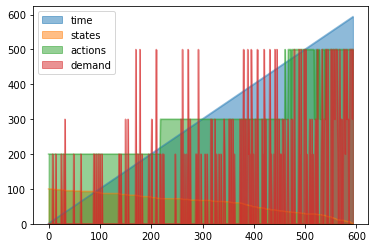

In [590]:
import xlsxwriter
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 17)
time_list = list(range(1,len(result)+1))
total_reward = sum(result)
data = {'total_reward': [total_reward]}
df2 = pd.DataFrame(data)
print(df2)
df = pd.DataFrame(list(zip(time_list, cap, action, demand, result)), columns=['time', 'states', 'actions', 'demand', 'rewards'], dtype=int)
print(df)
df_T = pd.DataFrame(df.values.T, index=['time', 'states', 'actions', 'demand', 'rewards'])
df2_T = pd.DataFrame(df2.values.T, index=['total_reward'])
print("\n")
print(df_T)
print("\ntotal reward: {}".format(total_reward))
# df3_T = pd.concat([df_T, df2_T])
# print(df3_T)
# file = "stimulate.xls"
# writer = pd.ExcelWriter(file, engine='xlsxwriter')
# df3_T.to_excel(writer, sheet_name='Sheet1')
# writer.save()
# df = df.cumsum()
df4 = pd.DataFrame(list(zip(time_list, cap, action, demand)), columns=['time', 'states', 'actions', 'demand'], dtype=int)
df4.plot.area(stacked=False)
plt.savefig('figure_1.png', dpi=300)


# Question d

[[500 500 500 ... 500 500 500]
 [500 500 500 ... 500 500 500]
 [500 500 500 ... 500 500 500]
 ...
 [200 200 200 ... 300 300 300]
 [200 200 200 ... 300 300 300]
 [200 200 200 ... 300 300 300]]
29573.139604651617
29573.139604651617


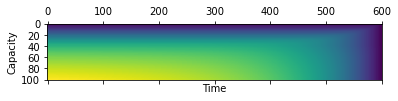

In [600]:
def calculate_new_v():
    new_value = [[0 for i in range(601)]for j in range(101)]
    policy = [[0 for i in range(600)]for j in range(100)]
    nppolicy = np.array(policy)
    list_value = [[500, 300, 200],
                  [0.001, 0.015, 0.05],
                  [0.01, 0.005, 0.0025]]
    for x in range(1, c+1):
        for t in reversed(range(T)):
            vtx = []
            for l in range(len(list_value[0])):
                lamda = 0
                for i in range(l+1):
                    lamda += lamda_t(t+1, list_value[1][i], list_value[2][i])
                f = list_value[0][l]
                vx = lamda*(f+new_value[x-1][t+1])+(1-lamda)*new_value[x][t+1]
                vtx.append(vx)
            new_value[x][t] = max(vtx)
            index = vtx.index(max(vtx))
            nppolicy[x-1,t] = list_value[0][index]
            if t < (T-1):
                if nppolicy[x-1,t] > nppolicy[x-1,t+1]:
                    nppolicy[x-1,t+1:T] = nppolicy[x-1,t]
                    for t2 in reversed(range(t,T)):
                        p = nppolicy[x-1,t2]
                        lamda = 0
                        if p == list_value[0][0]:
                            i = 0
                            lamda += lamda_t(t2+1, list_value[1][i], list_value[2][i])
                        elif p == list_value[0][1]:
                            for i in range(2):
                                lamda += lamda_t(t2+1, list_value[1][i], list_value[2][i])
                        elif p == list_value[0][2]:
                            for i in range(3):
                                lamda += lamda_t(t2+1, list_value[1][i], list_value[2][i])
                        vx = lamda*(p+new_value[x-1][t2+1])+(1-lamda)*new_value[x][t2+1]
                        new_value[x][t2] = vx
    return new_value, nppolicy
                
new_value, nppolicy = calculate_new_v()
print(nppolicy)

new_value_2 = [[0 for i in range(601)]for j in range(101)]
for x in range(1, c+1):
    for t in reversed(range(T)):
        p = nppolicy[x-1,t]
        lamda = 0
        vx = 0
        if p == list_value[0][0]:
            i = 0
            lamda += lamda_t(t+1, list_value[1][i], list_value[2][i])
        elif p == list_value[0][1]:
            for i in range(2):
                lamda += lamda_t(t+1, list_value[1][i], list_value[2][i])
        elif p == list_value[0][2]:
            for i in range(3):
                lamda += lamda_t(t+1, list_value[1][i], list_value[2][i])
        vx = lamda*(p+new_value_2[x-1][t+1])+(1-lamda)*new_value_2[x][t+1]
        new_value_2[x][t] = vx
print(new_value[100][0])  
print(new_value_2[100][0])  

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(new_value)
ax.set_xlabel('Time', fontsize=10)
ax.set_ylabel('Capacity', fontsize=10)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.savefig('revenue.png', bbox_inches='tight',dpi=300)
plt.show()

# Simulation

result:
 [0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 200, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 200, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 200, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 200, 0, 0, 0, 200, 0, 0, 0, 200, 0, 0, 300, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

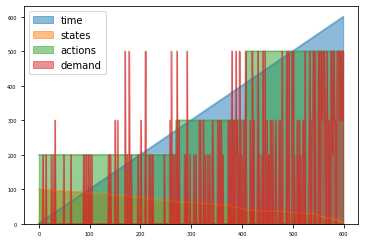

In [594]:
new_result = []
time = 0
capacity = 100
cap = []
action = []
for ind in reversed(range(c)):
    for index, po in enumerate(nppolicy[ind,:]):
        if time == 600 or capacity == 0:
            break
        elif index == time:
            cap.append(capacity)
            action.append(po)
            if demand[time] >= po:
                new_result.append(po)
                capacity -= 1
                time += 1
                break
            else:
                new_result.append(0)
                time += 1
            
print("result:\n {}".format(new_result))
print(len(new_result))
print(capacity)
print(time)
print(sum(i==0 for i in new_result))
print(new_result.index(500))

time_list = list(range(1,len(new_result)+1))
total_reward = sum(new_result)
df = pd.DataFrame(list(zip(time_list, cap, action, demand, new_result)), columns=['time', 'states', 'actions', 'demand', 'rewards'], dtype=int)
print(df)
df_T = pd.DataFrame(df.values.T, index=['time', 'states', 'actions', 'demand', 'rewards'])
print("\n")
print(df_T)
print("\ntotal reward: {}".format(total_reward))
df4 = pd.DataFrame(list(zip(time_list, cap, action, demand)), columns=['time', 'states', 'actions', 'demand'], dtype=int)
df4.plot.area(stacked=False)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.savefig('figure_2.png', dpi=300)

# Verification

In [554]:
# for ind in reversed(range(99)):
#     for t in range(1, T):
#         if (ind + t) < 99:
#             nppolicy[ind, t] = nppolicy[ind, t]
#         elif (ind + t) > 99:
#             if nppolicy[ind+1, t-1] > nppolicy[ind, t]:
#                 nppolicy[ind, t] = nppolicy[ind+1, t-1]

for ind in reversed(range(c)):
    for t in range(599):
        if (ind + t) == 99 and ind > 0:
            if nppolicy[ind, t] > nppolicy[ind-1, t+1]:
#                 nppolicy[ind-1, t+1] = nppolicy[ind, t]
                print("0")
                print(ind)
                print(t)
        elif (ind + t) > 99:
            if nppolicy[ind, t] > nppolicy[ind, t+1]:
#                 nppolicy[ind, t+1] = nppolicy[ind, t]
                print("1")
                
# print(nppolicy)